<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
 len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2576 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1051 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0377 - accuracy: 0.9885


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9770
test_acc: 0.9769999980926514


1/1 [==============================] - 0s 18ms/step


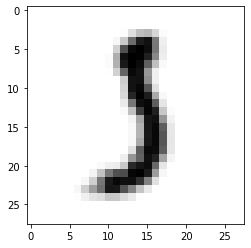

Исходное число  5
Предсказанное число  3
1/1 [==============================] - 0s 16ms/step


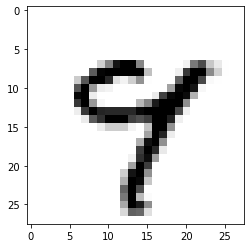

Исходное число  4
Предсказанное число  9
1/1 [==============================] - 0s 16ms/step


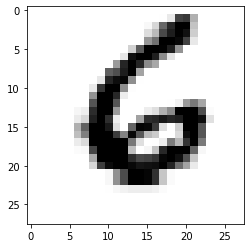

Исходное число  6
Предсказанное число  6
1/1 [==============================] - 0s 17ms/step


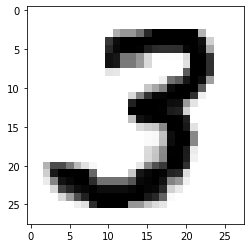

Исходное число  3
Предсказанное число  3


In [107]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
filenames = ('/content/drive/MyDrive/lab1/5.png','/content/drive/MyDrive/lab1/4.png','/content/drive/MyDrive/lab1/6.png','/content/drive/MyDrive/lab1/3.png')
labels = (5,4,6,3)
for i in range(len(filenames)):
  digit = image.load_img(filenames[i],target_size=(28,28),color_mode="grayscale")
  digit = image.img_to_array(digit)
  digit = np.array([digit])
  result1 = network.predict(digit.reshape(1,28*28))
  digit = digit.reshape(28, 28)
  plt.imshow(digit, cmap=plt.cm.binary)
  plt.show()
  print('Исходное число ', labels[i])
  print('Предсказанное число ',result1.argmax())